# Домашнее задание к уроку №2

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

In [2]:
X, y, W_default = make_regression(
    n_features=10,
    bias=3.5,
    noise=1.2,
    coef=True,
    random_state=42
)

In [3]:
W_default

array([16.74825823, 54.12963353,  5.19712837, 63.64302495, 93.62122462,
       70.64757265, 87.09691237, 10.45678403,  3.15861448, 70.90605195])

Предсказания модели

In [4]:
y_pred_default = X @ W_default

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

MSE

In [6]:
mse_default = calc_mse(y, y_pred_default)
mse_default

14.867688515340424

Градиентный спуск (оптимизация модели)

In [7]:
def my_grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
  
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # начальное значение весов
    min_err = float('inf')  # начальное значение ошибки модели
    n_iter = 0  # количество итераций
    stop_chek = True  # снижение ошибки
    errors = []  # визуализаця кривой обучения
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)
        errors.append(err)
        if min_err - err > tol:  # текущее значение ошибки
            min_err = err
        else: 
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [8]:
W_1, mse_1, score_1 = my_grad_desc(X, y, alpha=0.001, tol=0.00001)

Stop descent! iteration: 6787, weights: [17.01875467 54.47008695  4.75430151 63.30969306 93.39788652 71.0415159
 86.98587565 10.23653772  3.51117264 70.8122147 ], mse: 14.301232649300378


SGD

In [10]:
def my_sgd(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0):
    
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # начальное значение весов
    n_batch = n // batch_size  # количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  # начальное значение ошибки модели
    n_iter = 0  # количество итераций
    stop_chek = True  # снижение ошибки
    errors = []  # визуализация кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # достижение n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # достижение tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [11]:
W_2, mse_2, score_2 = my_sgd(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001)

Stop descent! n_epoch: 5470, weights: [17.03818059 54.52600376  4.6778117  63.30931397 93.3230552  71.13662682
 86.88308592 10.12245206  3.54214777 70.68269716], mse: 10.991934042644123


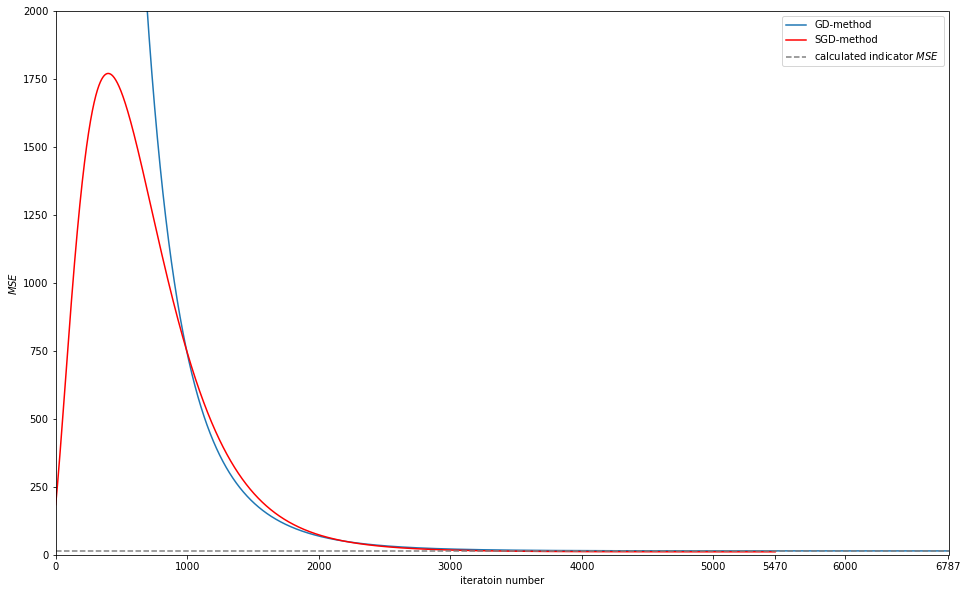

In [12]:
plt.figure(figsize=(16, 10))
plt.ylim((0,2000))
plt.xlim((0,len(score_1)-1000))
plt.plot([x for x in range(len(score_1))], score_1, label='GD-method')
plt.plot([x for x in range(len(score_2))], score_2, c='r', label='SGD-method')
plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xlabel('iteratoin number')
plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2)])
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()

In [13]:
len(score_1)

6787

Вывод: примерно до 800-й итерации значение SGD 'расходится', а значение MSE растет, затем, до уроня 2300-2400 итераций 
оба алгоритма сходились, при этом скорость схождения GD была выше, чем у SGD. 
Однако затем скорости уравнялись, и SGD сошелся раньше чем GD (5538 итераций против 6746).

2. Модифицировать решение первого задания путем добавления  𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [15]:
def euclid(vec):
    norm=0
    for i in vec:
        norm+=i**2
    return norm**0.5

Коррекция функции GD и SGD

In [16]:
def my_grad_desc_reg(X, y, alpha=1e-04, verbose=False, tol=0.0, lambda_=0.0):
    
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # начальное значение весов
    min_err = float('inf')  # начальное значение ошибки модели
    n_iter = 0  # количество итераций
    stop_chek = True  # снижение ошибки
    errors = []  # визуализация кривой обучения
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)+lambda_*euclid(W) # фактор L2 регуляризации
        errors.append(err)
        if min_err - err > tol:  # текущее значение ошибки
            min_err = err
        else: 
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))+lambda_*W # добавим коэфф. лямбда для расчёта весов
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [17]:
W_3, mse_3, score_3 = my_grad_desc_reg(X, y, alpha=0.001, tol=0.00001, lambda_=0.0000001)

Stop descent! iteration: 6796, weights: [17.01863651 54.46682393  4.75449511 63.30669328 93.39285248 71.0386195
 86.98267792 10.23480248  3.51157554 70.80888315], mse: 14.301654140681245


In [18]:
def my_sgd_reg(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0, lambda_=0.0):
    
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # начальное значение весов
    n_batch = n // batch_size  # количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  # начальное значение ошибки модели
    n_iter = 0  # количество итераций
    stop_chek = True  # снижение ошибки
    errors = []  # визуализация кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)+lambda_*euclid(W) # добавляем в расчет ошибки фактор L2 регуляризации
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)+lambda_*W
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # достижение n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # достижение tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [19]:
W_4, mse_4, score_4 = my_sgd_reg(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001, lambda_=0.0000001)

Stop descent! n_epoch: 5541, weights: [17.03465517 54.26930011  4.61433888 63.01559965 92.75037629 70.94952767
 86.45243946  9.83093592  3.61220325 70.21932101], mse: 14.569453678040682


Сравнение результатов

In [20]:
df=pd.DataFrame(
    {
        'methods':['GD', 'SGD','GD + L2','SGD + L2'],
        r'$\lambda$-coeff':[None,None,0.001,0.001],
        'tol-value': 0.00001,
        'iterations': [len(it) for it in [score_1, score_2, score_3,score_4]],
        'err-value': [it[-1] for it in [score_1, score_2, score_3,score_4]]
    }
)
df

,methods,$\lambda$-coeff,tol-value,iterations,err-value
0,GD,NaN,0.00001,6787,14.301223
1,SGD,NaN,0.00001,5470,10.991924
2,GD + L2,0.001,0.00001,6796,14.301644
3,SGD + L2,0.001,0.00001,5541,14.569444


Сравнение изменения весов 

In [21]:
df2=pd.DataFrame({'GD':W_1, 'SGD':W_2,'GD + L2':W_3,'SGD + L2':W_4}, index=['weigt'+str(i) for i in range(10)])
df2

,GD,SGD,GD + L2,SGD + L2
weigt0,17.018749,17.038181,17.018631,17.034655
weigt1,54.470064,54.526004,54.466802,54.269300
weigt2,4.754332,4.677812,4.754524,4.614339
weigt3,63.309693,63.309314,63.306693,63.015600
weigt4,93.397915,93.323055,93.392880,92.750376
weigt5,71.041478,71.136627,71.038583,70.949528
weigt6,86.985916,86.883086,86.982717,86.452439
weigt7,10.236582,10.122452,10.234845,9.830936
weigt8,3.511161,3.542148,3.511564,3.612203
weigt9,70.812265,70.682697,70.808932,70.219321


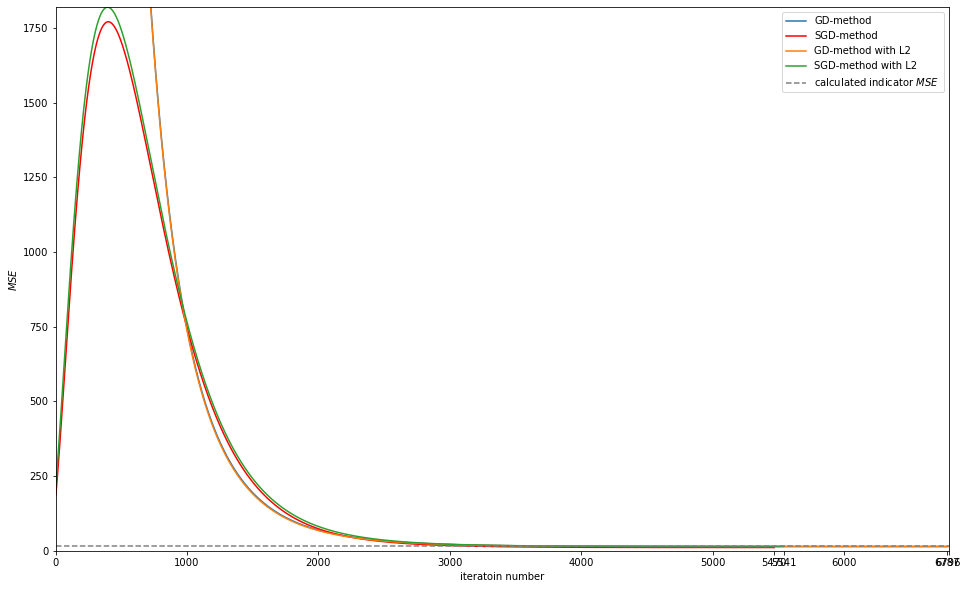

In [22]:
plt.figure(figsize=(16, 10))
plt.ylim((0,np.max([np.max(score_2),np.max(score_4)])))
plt.xlim((0,np.max([len(score_1), len(score_2), len(score_3), len(score_4)])-1000))
plt.plot([x for x in range(1, len(score_1) + 1)], score_1, label='GD-method')
plt.plot([x for x in range(1, len(score_2) + 1)], score_2, c='r', label='SGD-method')
plt.plot([x for x in range(1, len(score_3) + 1)], score_3, label='GD-method with L2')
plt.plot([x for x in range(1, len(score_4) + 1)], score_4, label='SGD-method with L2')
plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2), len(score_3), len(score_4)])
plt.xlabel('iteratoin number')
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()

Значения 'склеиваются' на графике